In [1]:
import pandas
import pandas as pd
import numpy as np

In [2]:
act = pandas.read_csv("bioactivities-16 15_04_13.tab", sep="\t")
act[:5]

,CMPD_CHEMBLID,MOLREGNO,PARENT_CMPD_CHEMBLID,PARENT_MOLREGNO,MOL_PREF_NAME,COMPOUND_KEY,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,...,APD_NAME,APD_CONFIDENCE,DOC_ID,DOC_CHEMBLID,PUBMED_ID,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE
0,CHEMBL279986,27889,CHEMBL279986,27889,NaN,1d,290.36,3.60,77.81,0,...,NaN,NaN,21047,CHEMBL1138679,15293997,J. Med. Chem.,2004,47,17,4258
1,CHEMBL161034,266396,CHEMBL161034,266396,NaN,34 (C121),391.85,4.87,89.23,0,...,NaN,NaN,17662,CHEMBL1138835,14736247,J. Med. Chem.,2004,47,3,673
2,CHEMBL443013,149758,CHEMBL443013,149758,NaN,19,245.32,2.62,80.00,0,...,NaN,NaN,15522,CHEMBL1133696,10893311,J. Med. Chem.,2000,43,14,2738
3,CHEMBL90461,149414,CHEMBL90461,149414,NaN,12,296.17,2.42,80.00,0,...,NaN,NaN,15522,CHEMBL1133696,10893311,J. Med. Chem.,2000,43,14,2738
4,CHEMBL95567,157724,CHEMBL95567,157724,NaN,2a,190.21,0.92,101.88,0,...,NaN,NaN,17071,CHEMBL1145823,12825927,J. Med. Chem.,2003,46,14,2834


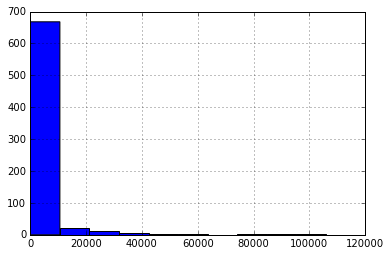

In [3]:
%matplotlib inline
act.STANDARD_VALUE.hist()

In [4]:
sum(act.ACTIVITY_COMMENT == "Not Active")

30

In [5]:
act[act.ACTIVITY_COMMENT == "Not Active"].STANDARD_VALUE

7     NaN
19    NaN
34    NaN
36    NaN
41    NaN
81    NaN
85    NaN
182   NaN
221   NaN
233   NaN
250   NaN
253   NaN
311   NaN
368   NaN
384   NaN
418   NaN
433   NaN
449   NaN
458   NaN
482   NaN
519   NaN
520   NaN
531   NaN
546   NaN
591   NaN
608   NaN
634   NaN
732   NaN
737   NaN
743   NaN
Name: STANDARD_VALUE, dtype: float64

In [6]:
act.iloc[:5,[0, 7]]

,CMPD_CHEMBLID,ALOGP
0,CHEMBL279986,3.60
1,CHEMBL161034,4.87
2,CHEMBL443013,2.62
3,CHEMBL90461,2.42
4,CHEMBL95567,0.92


In [7]:
act.loc[act.ACTIVITY_COMMENT == "Not Active","STANDARD_VALUE"] = 110000
act.loc[act.ACTIVITY_COMMENT == "Not Active","STANDARD_UNITS"] = "nM"

In [8]:
act.loc[act.ACTIVITY_COMMENT == "Not Active",["STANDARD_VALUE", "STANDARD_UNITS"]]

,STANDARD_VALUE,STANDARD_UNITS
7,110000,nM
19,110000,nM
34,110000,nM
36,110000,nM
41,110000,nM
81,110000,nM
85,110000,nM
182,110000,nM
221,110000,nM
233,110000,nM


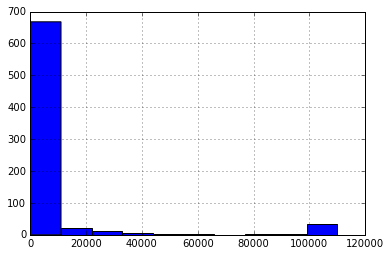

In [9]:
act.STANDARD_VALUE.hist()

In [10]:
np.where(np.isnan(act.STANDARD_VALUE))

(array([507, 575]),)

In [11]:
act.loc[[507, 575],"DATA_VALIDITY_COMMENT"]

507    Potential missing data
575    Potential missing data
Name: DATA_VALIDITY_COMMENT, dtype: object

In [12]:
act.shape

(749, 48)

In [13]:
act = act[~np.isnan(act.STANDARD_VALUE)]
act.shape

(747, 48)

In [14]:
from rdkit import Chem
from rdkit.Chem import Descriptors

/var/local/anacond3-filip/lib/python3.5/site-packages/rdkit/Chem/PeriodicTable.py:131: FutureWarning: split() requires a non-empty pattern match.
  splitLine = blankExpr.split(line)


In [15]:
act["MOL"] = act.CANONICAL_SMILES.apply(Chem.MolFromSmiles)

In [16]:
dataset = act[["MOL", "STANDARD_VALUE"]]

In [17]:
Descriptors.descList[120]

('fr_COO2', <function rdkit.Chem.Fragments._LoadPatterns.<locals>.<lambda>>)

In [18]:
for name, f in Descriptors.descList:
    dataset[name] = dataset.MOL.apply(f)

/var/local/anacond3-filip/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
import numpy as np
features = np.asarray(dataset.drop(["MOL", "STANDARD_VALUE"], axis=1))

In [20]:
features.shape

(747, 196)

In [21]:
features -= features.mean(axis=0)
features /= features.std(axis=0)

In [22]:
features.std(axis=0)

array([ nan,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
        nan,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,  nan,   1.,   1.,   1.,  nan,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,  nan,   1.,  nan,  nan,  nan,  nan,  nan,
        nan,   1.,   1.,   1.,   1.,   1.,   1.,  nan,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,  nan,   1.,   1.,   1.,   1.,
         1.,  nan,   1.,   1.,   1.,  nan,   1.,   1.,  nan,  nan,  nan,
         1.,   1.,   1.,  nan,   1.,   1.,   1.,   1.,   1.,  nan,  nan,
         1.,   1.,  nan,  nan,   1.,  nan,   1.,   1.,   1.,   1.,  nan,
        nan,  nan,   1.,  nan,   1.,  nan,  nan,  n

In [23]:
no_variance = np.abs(np.std(features, axis=0)) < 1e-2

In [24]:
for i in np.where(no_variance)[0]:
    dataset = dataset.drop([Descriptors.descList[i][0]], axis=1)

In [25]:
dataset.columns.shape

(198,)

In [26]:
from sklearn import cross_validation

In [27]:
ds_train, ds_test = cross_validation.train_test_split(dataset, test_size=0.25, random_state=1)

In [28]:
len(ds_train), len(ds_test)

(560, 187)

In [29]:
from sklearn.svm import SVR

In [ ]:
def X(dataset):
    return np.asarray(dataset[list(dataset.columns[2:])])

def y(dataset):
    return np.asarray(dataset.STANDARD_VALUE)

In [ ]:
clf = SVR(kernel="poly", degree=5, C=1.0, epsilon=0.2, verbose=True)
clf.fit(X(ds_train), y(ds_train))

In [ ]:
np.sum(np.square(clf.predict(X(ds_test)) - y(ds_test)))

In [ ]:
np.sum(np.square(clf.predict(X(ds_train)) - y(ds_train)))

In [ ]:
import sklearn.feature_selection

In [ ]:
eliminator = sklearn.feature_selection.RFE(clf, 8)

In [ ]:
eliminator.fit(X(ds_train), y(ds_train))